퍼셉트론 -> 다층신경망 -> 인공신경망의 학습방법->손실함수->경사 하강법과 오차 역전파->신경망의 성능 비교

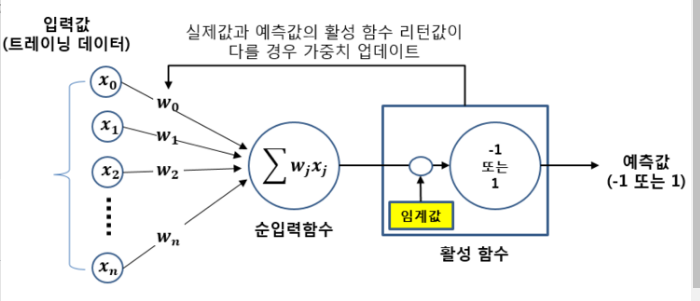

In [ ]:
# 퍼셉트론의 출력값  y = F(x1y1 + x2y2 +  .. b)

사인함수
  - y = sin(x)
  - x에 대해서 y값을 예측하는 모델을 만들기
  - 가중치는 랜덤하게 뽑아서 사용
  - 3차 다항식
    - 계수가 4개 , 4개의 랜덤한 가중치를 뽑는다

In [1]:
import math
import torch
import matplotlib.pyplot as plt

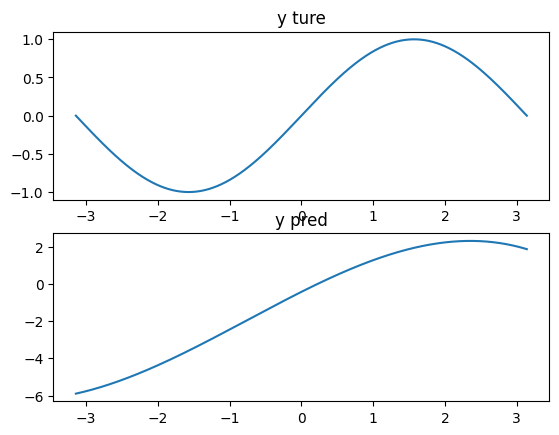

In [7]:
x = torch.linspace(-math.pi, math.pi, 1000)
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 가중치(계수)4개를 임의로 설정
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인함수에 예측할 3차 다항식 정의
y_random = a*x**3 + b*x**2 + c*x + d

#실제 sin곡선으로 시각화
plt.subplot(2,1,1)
plt.title("y ture")
plt.plot(x,y)

plt.subplot(2,1,2)
plt.title("y pred")
plt.plot(x,y_random)

plt.show()


가중치를 학습

In [11]:
# 가중치(계수)4개를 임의로 설정
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

x = torch.linspace(-math.pi, math.pi, 1000)
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 학습률
learning_rate = 1e-6 # 0.000001
# 학습은 200번
for epoch in range(500):
  y_pred = y_random = a*x**3 + b*x**2 + c*x + d
  #1 손실정의 mse  평균제곱오차
  loss = (y_pred - y).pow(2).sum().item()   # item()결과를 실수로 반환
  if epoch % 100 == 0:
    print(f"epoch{epoch+1} loss:{loss}")
  elif epoch == 199:
    print(f"epoch{epoch+1} loss:{loss}")

  # 2. 기울기를 미분 -- loss값을 미분
  grad_y_pred = 2.0*(y_pred - y)
  grad_a = (grad_y_pred*x**3).sum()
  grad_b = (grad_y_pred*x**2).sum()
  grad_c = (grad_y_pred*x).sum()
  grad_d = grad_y_pred.sum()

  # 3.가중치 업데이트 : 기울기와 반대로 동작.. 양수면 빼주고 음수면 더해줘야함.. 그래서 -=
  a -= learning_rate*grad_a
  b -= learning_rate*grad_b
  c -= learning_rate*grad_c
  d -= learning_rate*grad_d

epoch1 loss:29527.9453125
epoch101 loss:222.0689697265625
epoch200 loss:185.36117553710938
epoch201 loss:185.02667236328125
epoch301 loss:154.53884887695312
epoch401 loss:129.23074340820312


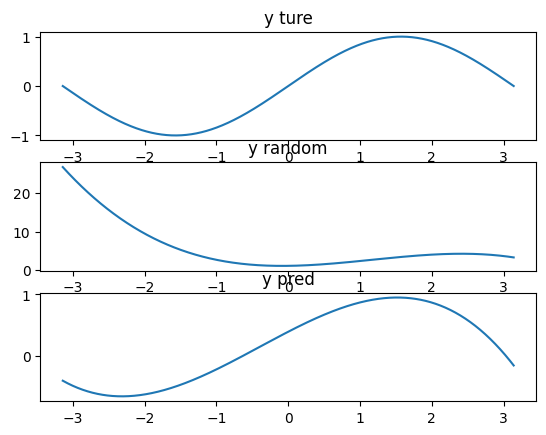

In [12]:
x = torch.linspace(-math.pi, math.pi, 1000)
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 가중치(계수)4개를 임의로 설정
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인함수에 예측할 3차 다항식 정의
y_random = a*x**3 + b*x**2 + c*x + d

#실제 sin곡선으로 시각화
plt.subplot(3,1,1)
plt.title("y ture")
plt.plot(x,y)
# 최초 학습하기전
plt.subplot(3,1,2)
plt.title("y random")
plt.plot(x,y_random)
# 학습완료후
plt.subplot(3,1,3)
plt.title("y pred")
plt.plot(x,y_pred)

plt.show()

앞으로 가중치 계산은 파이토치로 한다..

인공신경망 - 회귀분석

In [14]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# 평균제곱오차 : 작은 오차 / 큰 오차를 강하게 대비시킬수 있어 유용함

In [21]:
# 구현 : 다층 퍼셉트론
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [44]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(data)

In [45]:
len(data[0])

13

In [52]:
# 1. 모델정의
model = nn.Sequential(
    nn.Linear(13,50),
    nn.ReLU(),
    nn.Linear(50,100),
    nn.ReLU(),
    nn.Linear(100,1)
)

batch_size = 50
learning_rate = 0.001
optim = Adam(model.parameters(), lr= learning_rate) # 가중치를 수정하는 옵티마이저 정의

#에포크 반복
epochs = 300
for epoch in range(epochs):
  # 배치반복
  for i in range(len(data) // batch_size):
    start = i*batch_size   # 배치 크기에 맞게 인덱스 지정
    end = start + batch_size
    # 파이토치 실수형 텐서로 변환
    x = torch.FloatTensor(data[start:end])
    y = torch.FloatTensor(target[start:end])

    optim.zero_grad() # 기울기를 0으로 초기화
    preds = model(x)  # 예측
    loss = nn.MSELoss()(preds, y) # 손실값 계산
    loss.backward() # 오차 역전파( 각 계수의 미분지수를 구한다.)
    optim.step() # 적용
  if epoch % 20 == 0:
    print(f"epoch{epoch} loss:{loss.item()}")
  elif epoch == epochs-1:
    print(f"epoch{epoch} loss:{loss.item()}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:340.7650451660156
epoch20 loss:30.459497451782227
epoch40 loss:23.751047134399414
epoch60 loss:21.286178588867188
epoch80 loss:20.643428802490234
epoch100 loss:20.541339874267578
epoch120 loss:20.598594665527344
epoch140 loss:20.55190658569336
epoch160 loss:20.442228317260742
epoch180 loss:20.29697036743164
epoch200 loss:20.097158432006836
epoch220 loss:19.94488525390625
epoch240 loss:19.80797576904297
epoch260 loss:19.679386138916016
epoch280 loss:19.541166305541992
epoch299 loss:19.441997528076172


모델 평가

In [57]:
prediction = model(x[10])
real = y[10]
print(f"predict price : {prediction}, real price : {real}")

predict price : tensor([16.0409], grad_fn=<AddBackward0>), real price : 16.399999618530273
